[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/mcwg/calc-python-labs/blob/main/Lab4-Derivatives-with-Water-Level.ipynb)


<a name="title"></a>
# Lab 4: Numerically Approximating the Derivative at a Point

---


![Lake Mead at low water level](https://upload.wikimedia.org/wikipedia/en/7/7a/LakeMeadJuly2009.jpg)

Image credit: [“Lake Mead July 2009”](https://en.wikipedia.org/wiki/File:LakeMeadJuly2009.jpg) by Mjponso. [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/).


# <a name="intro">Lake Mead Nearing Dead Pool Status</a>

---

Lake Mead is the largest reservoir in the United States. Lake Mead is located on the border of Arizona and Nevada, approximately 25 miles outside of Las Vegas, Nevada. Lake Mead supplies water to nearly 20 million people and farms in parts of California, Arizona, Nevada, and Mexico$^{1}$. As a result of draught and the rising population in the Southwestern United States, Lake Mead has remained below full capacity, reaching a historic low in June, 2021. If the water level in Lake Mead decreases to an elevation below 895 feet, Lake Mead will not have enough water for the Hoover Dam to produce power$^{2}$.


In this lab, we import and analyze a large dataset containing water level measurements of Lake Mead from 2020 to 2023. We use Python to graphically and numerically approximate the derivative of the elevation of Lake Mead's water level and interpret the practical meaning of the approximations.

<br>  

1. ["Drought: Lake Mead is at an Historic Low"](https://web.archive.org/web/20150925121757/http://ecowatch.com/2015/04/28/drought-lake-mead-historic-low/). Ecowatch. April 28, 2015.
2. ["What Does “Dead Pool” Mean for the American West?"](https://www.sierraclub.org/sierra/what-does-dead-pool-mean-american-west). The Sierra Club. May 8, 2023.


# Learning Objectives

---

- Using Pandas dataframes to store and analyze large datasets.
- Interpreting data visualizations.
- Indexing and slicing dataframes.
- Numerically approximating the derivative at a point.
- Interpreting the derivative.


## Saving Your Work to a Colab Notebook

---

This lab is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


# Importing Required Libraries

---



In [ ]:
###################################
# Run to import required libraries
###################################
import numpy as np  # import numpy
import pandas as pd  # import pandas
import matplotlib.pyplot as plt  # import matplotlib.pyplot

## How Often Do We Need to Import Libraries?

---

After importing a library for the first time, we can now access functions in the library in any code cell we run, regardless of where the code cell is located in the notebook. Thus, we only need to run `import` commands such as `import numpy as np` or `import pandas as pd` once, and then we can continue calling in functions from those libraries (using specified abbreviations) for as long as the session remains active. If you take a break while working in Colab, your session may *time out* and disconnect.

- We need to import libraries one time after opening a notebook or reconnecting after timing out.
- We do not need to import the library again unless we take a break and the connection times out.


# Loading and Storing Lake Mead Data

---

Data exported from the [Lake Mead Water Database](https://lakemead.water-data.com/) is stored in a [comma separated values](https://en.wikipedia.org/wiki/Comma-separated_values) (or csv) file named `lake-mead-daily.csv` that is stored online in [GitHub](https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/lake-mead-daily.csv).


The Pandas command [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) can be used to store data from a csv file to a Pandas dataframe. We have already imported the Pandas library with the abbreviation `pd`.

- Run the first code cell below to import and store the Lake Mead water level data to a Pandas dataframe called `lake_mead`.
  - *There will not be any output displayed after running the first code cell.*
- Then run the second code cell below to view the first 5 rows of the dataframe `lake_mead` on screen.

In [ ]:
###################################
# Run to store data to a dataframe
###################################
lake_mead = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/lake-mead-daily.csv')

In [ ]:
######################################
# Run to display first 5 rows of data
######################################
lake_mead.head()  # display first 5 rows of data

,Date,Year,t,Elevation,Change,Content
0,1-Jan,2020,0,1090.64,0.15,10912000
1,2-Jan,2020,1,1090.74,0.10,10921000
2,3-Jan,2020,2,1090.84,0.10,10930000
3,4-Jan,2020,3,1090.94,0.10,10938000
4,5-Jan,2020,4,1091.06,0.12,10949000


# Dataframes

---

A **dataframe** is a system for storing data in rows and columns, similar to an Excel spreadsheet.

- Each row of a dataframe corresponds to a different **observation**.
  - Each row is referenced by a number called the **row index**.
  - The first (unlabeled) column in the output of the previous code cell indicates the index of each row.
  - **Notice indexing in Python starts with 0 (not 1).**
- Each column of a dataframe corresponds to a different **variable**.
  - Columns can be referenced by a **column label** indicated in the header row of the table.

We use the [Pandas library](https://pandas.pydata.org/) to import and store data as [Pandas DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

# Exploring the Lake Mead Data</a>
---

Let `df` denote the name of a generic Pandas dataframe.
Before beginning our analysis, we need to know what data is stored in the dataframe `df`. For large datasets, displaying the entire dataset on screen is not particularly helpful or practical. Below are some helpful Pandas functions that can help provide an initial glimpse into the data stored in dataframe `df`.



- `df.head()` displays the first 5 rows of `df`.
- `df.tail()` displays the last 5 rows of `df`.
- `df.shape` returns the number of rows (observations) and columns (variables) in `df`.
- `df.columns` lists the names of the variables (or column labels).
- `df.info()` summarizes the structure of all variables in `df`.

# Question 1

---

The dataframe `lake_mead` contains measurements for the water level of Lake Mead. Experiment with commands in the code cell below below (turning the comments on or off to run different commands) to learn about the data stored in `lake_mead`. Based on the output generated by one or more of the commmands, answer the following questions:


- How many observations are in the `lake_mead` dataframe?
- How many variables are in the `lake_mead` dataframe and what are the names of the variables?
- What range of dates are included in the `lake_mead` dataframe?
- How frequently are water-level observations recorded in the `lake_mead` dataframe?

<br>





In [ ]:
#####################################
# Turn comments on or off and
# run different commands to learn
# about the data stored in lake_mead
#####################################

lake_mead.head()  # display first 5 rows of data
#lake_mead.tail()  # display last 5 rows of data
#lake_mead.shape  # indicate the number of rows (observations) and columns (variables)
#lake_mead.columns  # display the column headers
#lake_mead.info()  # provides information about the structure of the data

## Solution to Question 1

---

- There are a total of <mark>??</mark> observations in `lake_mead`.

- There are a total of <mark>??</mark> variables in `lake_mead`.

- The names of the variables in `lake_mead` are <mark>??</mark>.

- The observations in `lake_mead` begin on the date <mark>??</mark> and end on the date <mark>??</mark>.

- Observations in `lake_mead` are recorded every <mark>??</mark>.



<br>  
<br>

# Data Dictionary for `lake_mead`

---


- `Date` and `Year` are the calendar date and year, respectively.
- `t` is the number of days since the start of the calendar year. For example:
  - The observations on January 1 in 2020, 2021, 2022, and 2023 all have `t=0`.
  - The observations on January 2 in 2020, 2021, 2022, and 2023 all have `t=1`.
- `Elevation` is the elevation of the water level in feet.
- `Change` is the change in the elevation (from the previos day), in feet.
- `Content` is the volume of the water in acre feet.

<br>  

*The first (unlabeled) column is the index column that gives the row index of each row. We will explore [indexing and slicing data](#index-slice) later in this lab.*


# Plotting Lake Mead Water Level Elevations for 2020-2023

---

Run the code cell below to create a single plot that has four separate graphs of water-level elevation of Lake Mead for each of the years 2020, 2021, 2022, and 2023.

<br>  

*Note: You are not being asked to write, edit, or interpret any of the commands in the code cell below. Simply run the code cell below to generate a plot that you will interpret next.*



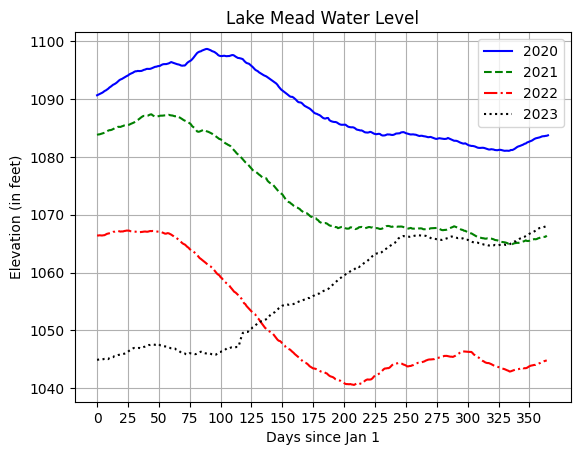

In [ ]:
##########################################################
# Run code cell to generate plot of Lake Mead
# water level elevations for 2020, 2021, 2022, and 2023.
# You do not need to edit any commands in this code cell.
##########################################################

############################################
# create separate dataframes for each year
############################################
mead_20 = lake_mead.loc[lake_mead['Year'] == 2020]  # select rows with Year equal to 2020
mead_21 = lake_mead.loc[lake_mead['Year'] == 2021]  # select rows with Year equal to 2021
mead_22 = lake_mead.loc[lake_mead['Year'] == 2022]  # select rows with Year equal to 2022
mead_23 = lake_mead.loc[lake_mead['Year'] == 2023]  # select rows with Year equal to 2023

####################################################
# Reset indices so each dataframe starts index at 0
####################################################
mead_21 = mead_21.reset_index(drop=True)  # reset row index 2021
mead_22 = mead_22.reset_index(drop=True)  # reset row index 2022
mead_23 = mead_23.reset_index(drop=True)  # reset row index 2023

###############################
# Plot t vs Elevation for 2020
###############################
plt.plot(mead_20['t'],  # plot t on x-axis
         mead_20['Elevation'],  # plot elevation on y-axis
         color ='blue',  # plot curve in blue
         label = '2020')  # add label for legend

###############################
# Plot t vs Elevation for 2021
###############################
plt.plot(mead_21['t'],  # plot t on x-axis
         mead_21['Elevation'],  # plot elevation on y-axis
         color ='green',  # plot curve in green
         linestyle='--',  # use dashed linestyle
         label = '2021')  # add label for legend

###############################
# Plot t vs Elevation for 2022
###############################
plt.plot(mead_22['t'],  # plot t on x-axis
         mead_22['Elevation'],  # plot elevation on y-axis
         color ='red',  # plot curve in red
         linestyle='-.',  # use dashdot linestyle
         label = '2022')  # add label for legend

###############################
# Plot t vs Elevation for 2023
###############################
plt.plot(mead_23['t'],  # plot t on x-axis
         mead_23['Elevation'],  # plot elevation on y-axis
         color ='black',  # plot curve in black
         linestyle = ':',  # use dotted linestyle
         label = '2023')  # add label for legend

###############
# Plot options
###############
plt.title('Lake Mead Water Level')  # main plot label
plt.xlabel('Days since Jan 1')  # label on x-axis
plt.ylabel('Elevation (in feet)')  # label for the y-axis
plt.xticks(np.arange(0, 365, step=25))  # Set tick marks
plt.grid(True)  # add grid
plt.legend()  # add legend

# Display the plot
plt.show()

# Question 2

---

Using the plot generated by the code cell above, answer the question to compare the water-level elevations of Lake Mead when $t=150$ in the years 2020 to 2023.

- In which year is the water-level elevation of Lake Mead greatest when $t=150$?

- In which year is the water-level elevation of Lake Mead smallest when $t=150$?

- In which years (if any) is the water-level elevation of Lake Mead rising when $t=150$?

- In which years (if any) is the water-level elevation of Lake Mead falling when $t=150$?



## Solution to Question 2

---

Enter a year or list of years in each highlighted area.

- The water-level elevation is greatest when $t=150$ in <mark>(enter year)</mark>.

<br>  

- The water-level elevation is smallest when $t=150$ in  <mark>(enter year)</mark>.

<br>  

- The water-level elevation is rising when $t=150$ in <mark>(enter years)</mark>.  *If there are no years in which the water level is rising, then type NONE.*

<br>  

- The water-level elevation is falling when $t=150$ in <mark>(enter years)</mark>. *If there are no years in which the water level is falling, then type NONE.*

<br>  
<br>  


<a name="index-slice"></a>
# Indexing and Slicing Pandas Dataframes

---

In data science, **slicing** a dataframe is a very useful method for cutting a subset of data from the entire dataframe. In Python, **indexing** is used to refer to specific rows and columns of a dataframe. We enter the location of data of interest as an ordered pair (separated by comma) inside a set of square brackets,  `[row_info , column_info]`.

- First, we enter the index of the row(s) we would like to slice.
- After the comma, we identify the column(s) we would like to slice.






## The Index Column

---

The first (unlabeled) column is called the **index column**, and it is not a variable. The index column indicates the **row index** (or row number) of each row in the dataframe. **In Python, indexing starts at 0** (not at 1).

- The $1^{\text{st}}$ row has row index `0`.
- The $2^{\text{nd}}$ row has row index `1`.
- In general, the $i^{\text{th}}$ row of the dataframe has row index `i-1`.


<a name="loc"></a>
## Indexing with `loc`

---

The [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) function is a Pandas command commonly used to slice data from a dataframe. To locate the entry in a dataframe named `df` in the row with index `row_index` and column with label `col_label`, we can use the command below `df.loc[row_index, 'col_label']`.

<br>  

*Note: Be sure to type the column label inside a pair of quotes.*


# Question 3

---

The table below gives the output of the command `lake_mead.head()`. Use the first 5 rows of data from `lake_mead` to answer the question.

<br>

| |Date|Year|t|Elevation|Change|Content|
|---|---|---|---|---|---|---|
|0|1-Jan|2020|0|1090\.64|0\.15|10912000|
|1|2-Jan|2020|1|1090\.74|0\.1|10921000|
|2|3-Jan|2020|2|1090\.84|0\.1|10930000|
|3|4-Jan|2020|3|1090\.94|0\.1|10938000|
|4|5-Jan|2020|4|1091\.06|0\.12|10949000|

<br>


## Question 3a

---

Without running the command, determine what the output of the command `lake_mead.loc[2, 'Elevation']` will be. Then run the code cell to verify your answer



### Solution to Question 3a

---

The output of `lake_mead.loc[2, 'Elevation']` will be <mark>??</mark>.

After typing your answer in the space above, run the code cell below to check your answer.

<br>

*Hint: Recall indexing in Python starts at 0.*


<br>  
<br>  


In [ ]:
####################################################
# Run code cell to check your answer to Question 3a
####################################################
lake_mead.loc[2, 'Elevation']

## Question 3b

---

Use the `loc` function in the code cell below to extract the value of the **volume of water** (in acre feet) in Lake Mead on **January 4, 2020**.


*Hint: The output should be 10,938,000 acre feet.*

### Solution to Question 3b

---


In [ ]:
############################
# Solution to Question 3b
############################
lake_mead.loc[??, '??']

# Lake Mead Data in 2023

---

In the next question we analyze the water level of Lake Mead at the start of 2023 .The dataframe `lake_mead` contains 4 years of Lake Mead water level data (2020 to 2023). The code cell used earlier to create the plot of Lake Mead data for 2020-2023 contained code that created 4 separate dataframes for each of the 4 years.

- `mead_20` contains Lake Mead water level data for 2020.
- `mead_21` contains Lake Mead water level data for 2021.
- `mead_22` contains Lake Mead water level data for 2022.
- `mead_23` contains Lake Mead water level data for 2023.
- *We will use the 2023 data in `mead_23` to answer the remaining questions.*


Run the code cell below to display the first 5 rows of data stored in `mead_23`. Note the first observation corresponds to data from January 1, 2023.

In [ ]:
######################################
# Run to display first 5 rows of data
######################################
mead_23.head()

,Date,Year,t,Elevation,Change,Content
0,1-Jan,2023,0,1044.91,0.09,7320000
1,2-Jan,2023,1,1044.95,0.04,7322530
2,3-Jan,2023,2,1044.99,0.04,7325000
3,4-Jan,2023,3,1044.97,-0.02,7324000
4,5-Jan,2023,4,1044.96,-0.01,7323000


<a name="q4"></a>
# Question 4

---

Let $f(t)$ be the elevation (in feet) of the water level of Lake Mead $t$ days after January 1, 2023.  Run the code cell below to create a plot of the water level elevation of the Lake Mead at the start of 2023. Then use the graph generated by the code below to answer the questions that follow.



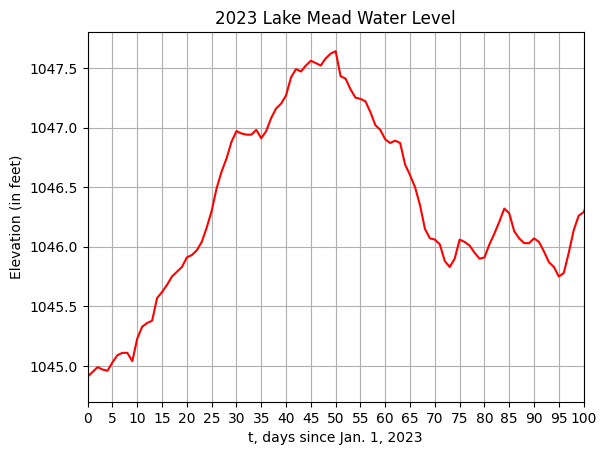

In [ ]:
##########################################################
# Run code cell to generate plot of Lake Mead
# water level elevations.
# You do not need to edit any commands in this code cell.
##########################################################

############################################################
# Plot t vs Elevation for First 100 days of 2023
############################################################
plt.plot(mead_23['t'],  # plot t on x-axis
         mead_23['Elevation'],  # plot Elevation on y-axis
         color ='red')  # plot curve in red

###############
# Plot options
###############
plt.title('2023 Lake Mead Water Level')  # main plot label
plt.xlabel('t, days since Jan. 1, 2023')  # label on x-axis
plt.ylabel('Elevation (in feet)')  # label for the y-axis
plt.xticks(np.arange(0, 101, step=5))  # Set ticks on x-axis
plt.xlim(0, 100)  # set range on x-axis to plot first 101 days of 2023
plt.ylim(1044.7, 1047.8)  # set range on y-axis
plt.grid(True)  # add grid to plot

# Display the plot
plt.show()

<a name="q4a"></a>
## Question 4a

---

Based on the graph above, rank the values $f(25)$, $f(40)$, and $f(65)$ in order from largest to smallest. Explain how you determined your answer.





### Solution to Question 4a

---

1. The largest value is <mark>$f(??)$</mark>.
2. The second largest value is <mark>$f(??)$</mark>.
3. The smallest value is <mark>$f(??)$</mark>.

<br>  

Briefly explain how you determined your rankings in the space below.




<br>  
<br>  


<a name="q4b"></a>
## Question 4b

---

Use the dataframe `mead_23` and the `loc` function to extract the values of $f(25)$, $f(40)$ and $f(65)$ in each of the three code cells below and confirm your answer to [Question 4a](#q4a).


### Solution to Question 4b

---

Replace the `??` in each code cell below with a corresponding row index to display the values $f(25)$, $f(40)$, and $f(65)$, respectively.



In [ ]:
##########################################
# Replace ?? with a row index.
# Then run to display the value of f(25).
##########################################
mead_23.loc[??, 'Elevation']

In [ ]:
##########################################
# Replace ?? with a row index.
# Then run to display the value of f(40).
##########################################
mead_23.loc[??, 'Elevation']

In [ ]:
##########################################
# Replace ?? with a row index.
# Then run to display the value of f(65).
##########################################
mead_23.loc[??, 'Elevation']

<a name="q4c"></a>
## Question 4c

---

Based on the graph above, rank the values $f'(25)$, $f'(40)$, and $f'(65)$ in order from largest to smallest. Explain how you determined your answer.





<a name="sol4c"></a>
### Solution to Question 4c

---

1. The largest value is <mark>$f'(??)$</mark>.
2. The second largest value is <mark>$f'(??)$</mark>.
3. The smallest value is <mark>$f'(??)$</mark>.

<br>  

Briefly explain how you determined your rankings in the space below.




<br>  
<br>  



# Numerical Differentiation in Python

---



Graphs are useful for identifying important features and patterns, but we are typically limited in how accurately we can approximate values such as $f'(25)$. We can obtain more accurate approximations using the precise values for the water-level elevations stored in the dataframe `mead_23`.

Run the command `mead_23.loc[25:35]` in the code cell below to display data from `mead_23` in rows starting at index `25` up to and including index `35`.


In [ ]:
###############################
# Run to display rows 25 to 35
###############################
mead_23.loc[25:35]

,Date,Year,t,Elevation,Change,Content
25,26-Jan,2023,25,1046.30,0.14,7418000
26,27-Jan,2023,26,1046.49,0.19,7432000
27,28-Jan,2023,27,1046.63,0.14,7441000
28,29-Jan,2023,28,1046.74,0.11,7449000
29,30-Jan,2023,29,1046.88,0.14,7459000
30,31-Jan,2023,30,1046.97,0.09,7465634
31,1-Feb,2023,31,1046.95,-0.02,7464000
32,2-Feb,2023,32,1046.94,-0.01,7464000
33,3-Feb,2023,33,1046.94,0.00,7464000
34,4-Feb,2023,34,1046.98,0.04,7466000


<a name="q5"></a>
# Question 5

---

Let $f(t)$ be the elevation (in feet) of the water level of Lake Mead $t$ days after January 1, 2023.  If needed, refer to the table from the output above to help answer the question related to the average rate of change of $f$ from $t=25$ to $t=35$.




<a name="q5a"></a>
## Question 5a

---


Compute the average rate of change of the water level elevation of Lake Mead over the interval from $t=25$ to $t=35$.

- Replace each `??` in the first code cell below with an appropriate row index or column label to extract relevant values from the dataframe `mead_23`.
- Use the table above to verify the output of the commands of the first code cell before moving on.
- In the second code cell below, replace each `??` with either  `t_start_q5`, `t_end_q5`, `f_start_q5` or `f_end_q5` to compute the average rate of change of $f$ over the interval from $t=25$ to $t=35$.

<br>  

*Hint: The average rate of change of $f$ over the interval from $t=a$ to $t=b$ is given by the formula $\dfrac{f(b) - f(a)}{b-a}$.*

### Solution to Question 5a

---


In [ ]:
########################################################
# Replace each ?? with an index value or column label.
########################################################
# Extract start and end values of t
t_start_q5 = mead_23.loc[??, '??']  # start time
t_end_q5 = mead_23.loc[??, '??']  # end time

# Extract corresponding start and end water level elevations
f_start_q5 = mead_23.loc[??, '??']  # elevation at start time
f_end_q5 = mead_23.loc[??, '??']  # elevation at end time

print("The start time is t=", t_start_q5,
      "and the starting elevation is f(25)=", f_start_q5,
      "\nThe end time is t=", t_end_q5,
      "and the ending elevation is f(35)=", f_end_q5)

In [ ]:
#################################################################
# Replace each ?? with either t_start_q5, t_end_q5,
# f_start_q5, or f_end_q5 to compute the average rate of change.
#################################################################
( ?? - ?? ) / ( ?? - ?? )  # average rate of change

<a name="q5b"></a>
## Question 5b

---

Interpret the practical meaning of the output of the previous code cell.





### Solution to Question 5b

---

Type your interpretation in the space below. Be sure to include units in your interpretation.




<br>  
<br>  


<a name="q5c"></a>
## Question 5c

---


Explain how you can illustrate the the average rate of change in Question 5a on the graph in the plot above.




### Solution to Question 5c

---

Type your answer in the space below.







<br>  
<br>  

# An Important Caution With the `row_index`

---

In [Question 5](#q5), the values of the `row_index` and variable `t` are identical. This is not generally the case. For example, suppose the 2023 Lake Mead data over the period from $t=25$ to $t=35$ is stored in a dataframe with the following indices:

| Index |Date | Year | t | Elevation | Change | Content |
|---|---|---|---|---|---|---|
| 1121|26-Jan|2023|25|1046\.3|0\.14|7418000|
| 1122| 27-Jan  |2023|26|1046\.49|0\.19|7432000|
| 1123|28-Jan|2023|27|1046\.63|0\.14|7441000|
| 1124|29-Jan|2023|28|1046\.74|0\.11|7449000|
| 1125|30-Jan|2023|29|1046\.88|0\.14|7459000|
| 1126|31-Jan|2023|30|1046\.97|0\.09|7465634|
| 1127|1-Feb|2023|31|1046\.95|-0\.02|7464000|
| 1128|2-Feb|2023|32|1046\.94|-0\.01|7464000|
| 1129|3-Feb|2023|33|1046\.94|0\.0|7464000|
| 1130|4-Feb|2023|34|1046\.98|0\.04|7466000|
|1131|5-Feb|2023|35|1046\.91|-0\.07|7461000|

<br>  

Then we could calculate the average rate of change of the water level evelvation from $t=25$ to $t=35$ by identifing the relevant row indices as follows:

- At $\color{dodgerblue}{t=25}$, the time and water level elevation $\color{dodgerblue}{f(25)}$ would both sliced using the row index $\color{dodgerblue}{1121}$.
- At $\color{tomato}{t=35}$, the time $t$ and water level elevation $\color{tomato}{f(35)}$ would both be sliced using the row index $\color{tomato}{1131}$.


<a name="q6"></a>
# Question 6

---

Let $f(t)$ be the elevation (in feet) of the water level of Lake Mead $t$ days after January 1, 2023.  If needed, refer to the table below to help answer the question related to the average rate of change of $f$ from $\color{dodgerblue}{t=25}$ to $\color{tomato}{t=30}$.


| |Date|Year|t|Elevation|Change|Content|
|---|---|---|---|---|---|---|
|25|26-Jan|2023|25|1046\.3|0\.14|7418000|
|26|27-Jan|2023|26|1046\.49|0\.19|7432000|
|27|28-Jan|2023|27|1046\.63|0\.14|7441000|
|28|29-Jan|2023|28|1046\.74|0\.11|7449000|
|29|30-Jan|2023|29|1046\.88|0\.14|7459000|
|30|31-Jan|2023|30|1046\.97|0\.09|7465634|
|31|1-Feb|2023|31|1046\.95|-0\.02|7464000|
|32|2-Feb|2023|32|1046\.94|-0\.01|7464000|
|33|3-Feb|2023|33|1046\.94|0\.0|7464000|
|34|4-Feb|2023|34|1046\.98|0\.04|7466000|
|35|5-Feb|2023|35|1046\.91|-0\.07|7461000|


<a name="q6a"></a>
## Question 6a

---


Compute the average rate of change of the water level elevation of Lake Mead over the interval from $\color{dodgerblue}{t=25}$ to $\color{tomato}{t=30}$.

- Replace each `??` in the first code cell below with an appropriate row index or column label to extract relevant values from the dataframe `mead_23`.
- Use the table above to verify the output of the commands of the first code cell before moving on.
- In the second code cell below, replace each `??` with either  `t_start_q6`, `t_end_q6`, `f_start_q6` or `f_end_q6` to compute the average rate of change of $f$ over the interval from $t=25$ to $t=30$.

<br>  

*Hint: The average rate of change of $f$ over the interval from $t=a$ to $t=b$ is given by the formula $\dfrac{f(b) - f(a)}{b-a}$.*

### Solution to Question 6a

---


In [ ]:
######################################################
# Replace each ?? with an index value or column label
######################################################

# Extract start and end values of t
t_start_q6 = mead_23.loc[??, '??']  # start time
t_end_q6 = mead_23.loc[??, '??']  # end time

# Extract corresponding start and end water level elevations
f_start_q6 = mead_23.loc[??, '??']  # elevation at start time
f_end_q6 = mead_23.loc[??, '??']  # elevation at end time

print("The start time is t=", t_start_q6,
      "and the starting elevation is f(25)=", f_start_q6,
      "\nThe end time is t=", t_end_q6,
      "and the ending elevation is f(30)=", f_end_q6)

In [ ]:
################################################################
# Replace each ?? with either t_start_q6, t_end_q6,
# f_start_q6, or f_end_q6 to compute the average rate of change
################################################################
( ?? - ?? ) / ( ?? - ?? )  # average rate of change

<a name="q6b"></a>
## Question 6b

---

Interpret the practical meaning of the output of the previous code cell.





### Solution to Question 6b

---

Type your interpretation in the space below. Be sure to include units in your interpretation.




<br>  
<br>  


<a name="q6c"></a>
## Question 6c

---

Which is a more accurate approximation for $f'(25)$, the average rate of change of $f$ from $t=25$ to $t=35$ (see [Question 5a](#q5a)) or the the average rate of change of $f$ from $t=25$ to $t=30$ (see [Question 6a](#q6a))? Support your answer with an explanation.



### Solution to Question 6c

---

Type your answer in the space below and briefly explanation why.





<br>  
<br>  

<a name="q7"></a>
# Question 7

---

Let $f(t)$ be the elevation (in feet) of the water level of Lake Mead $t$ days after January 1, 2023. Run the code cell below to create an interactive Python widget from the data stored in `mead_23` to explore the average rate of change of $f$ over different intervals of time near $t=25$ and confirm your answers to [Question 5a](#q5a) and [Question 6a](#q6a).

The widget created is a graph of $f$ with a line segment joining the point on the graph at $t=25$ to a second point on the graph at a value of $t$ chosen with slider located above the graph.

- You do not need to edit, interpret, or understand the code in the cell below.
- You only need to run the code once.
- Then use the slider to interact with the resulting widget.

Interact with the widget created by the code cell below to answer the question.



In [ ]:
##################################################
# Run code cell to generate an interactive widget.
# Do not edit the code cell. Just run it!
##################################################
from ipywidgets import interact, IntSlider, widgets  # import interactive elements


##################################
# Convert columns to NumPy arrays
##################################
t = mead_23['t'].to_numpy()  # store time in numpy array
elevation = mead_23['Elevation'].to_numpy()  # store elevation in numpy array
flow_rate = mead_23['Change'].to_numpy()  # store rate of change in numpy array

##############################
# Create the interactive plot
##############################
def plot_interactive(x_point):
  plt.plot(t, elevation, color ='red', label = 'Water Level') # water level plot
  plt.text(t[25], elevation[25],  # label the point at t=25
           f'({t[25]}, {elevation[25]:.2f})',  # coordinates of point
           color = 'black',  # color of text
          size = 'large')  # size of text
  plt.text(x_point, elevation[x_point],  # label the point on water level plot
           f'({x_point}, {elevation[x_point]:.2f})',  # coordinates of point
           color = 'black',  # color of text
           size = 'large')  # size of text
  arc_temp = (elevation[x_point] - elevation[25]) / (t[x_point] - t[25])  # compute arc
  plt.text(25, 1045.1,  # indicate value of ARC
           f'The average rate of change is {arc_temp:.4f}.',  # arc
           color = 'red',  # color of text
           size = 'large')  # size of text

  ###################################################
  # Plot line joining points
  ###################################################
  t_values = [t[25], x_point]  # store start/end t values
  f_values = [elevation[25], elevation[x_point]]  # store start/end f(t) values
  plt.plot(t_values,  # start/end values of t
           f_values,  # start/end values of f(t)
           color = 'black', # plot line in black
           marker = 'o',  # plot points to mark start\end points
           linestyle = ':')  # plot as dotted line

  ###############
  # plot options
  ###############
  plt.title('2023 Lake Mead Water Level')  # main plot label
  plt.xlabel('t, days since Jan. 1, 2023')  # label on x-axis
  plt.ylabel('Elevation (in feet)')  # label for the y-axis
  plt.xticks(np.arange(0, 101, step=5))  # Set ticks on x-axis
  plt.xlim(0, 100)  # set range on x-axis to plot first 101 days of 2023
  plt.ylim(1044.7, 1047.8)  # set range on y-axis
  plt.grid(True)  # add grid to plot

  ####################
  # Display the plot
  ####################
  plt.show()

###########################################
# Create slider for selecting second point
###########################################
style = {'description_width': 'initial'}  # set width of slider label
# Slider for choosing point
x_slider = IntSlider(value=40, min=0, max=99, step=1,
                     description='Select second point at t=', style=style,
                     layout=widgets.Layout(height='80px'),
                     labelHeight = 1)

# Use interact to connect the slider to the plotting function
interact(plot_interactive, x_point=x_slider);


<a name="q7a"></a>
## Question 7a

---

Use the slider in the widget above to compute and illustrate the average rate of change of Lake Mead's water level elevation over the interval from $t=25$ to $t=35$. Based on the output, check your solution to [Question 5a](#q5a).


### Solution to Question 7a

---

Use the widget to answer the question. If your answer in [Question 5a](#q5a) is not consistent with output from the widget, then try to correct your solution to [Question 5a](#q5a).

<br>  

*You do not need to enter any work to answer this question.*


<br>  


<a name="q7b"></a>
## Question 7b

---

Use the slider in the widget above to compute and illustrate the average rate of change of Lake Mead's water level elevation over the interval from $t=25$ to $t=30$. Based on the output, check your solution to [Question 6a](#q6a).


### Solution to Question 7b

---

Use the widget to answer the question. If your answer in [Question 6a](#q6a) is not consistent with output from the widget, then try to correct your solution to [Question 6a](#q6a).

<br>  

*You do not need to enter any work to answer this question.*


<br>  


<a name="q7c"></a>
## Question 7c

---

Using the slider in the widget above, what is the best approximation for $f'(25)$.


### Solution to Question 7c

---

Based data in `mead_23` plotted in the widget above, the best approximation is $f'(25) \approx$ <mark>??</mark>?

<br>  

Explain how you determined your answer in the space below.




<br>  
<br>  


<a name="q8"></a>
# Question 8

---

Let $f(t)$ be the elevation (in feet) of the water level of Lake Mead $t$ days after January 1, 2023.  If needed, refer to the table below to help answer the question about $f'(25)$.

<br>  


| |Date|Year|t|Elevation|Change|Content|
|---|---|---|---|---|---|---|
|25|26-Jan|2023|25|1046\.3|0\.14|7418000|
|26|27-Jan|2023|26|1046\.49|0\.19|7432000|
|27|28-Jan|2023|27|1046\.63|0\.14|7441000|
|28|29-Jan|2023|28|1046\.74|0\.11|7449000|
|29|30-Jan|2023|29|1046\.88|0\.14|7459000|
|30|31-Jan|2023|30|1046\.97|0\.09|7465634|
|31|1-Feb|2023|31|1046\.95|-0\.02|7464000|
|32|2-Feb|2023|32|1046\.94|-0\.01|7464000|
|33|3-Feb|2023|33|1046\.94|0\.0|7464000|
|34|4-Feb|2023|34|1046\.98|0\.04|7466000|
|35|5-Feb|2023|35|1046\.91|-0\.07|7461000|

<br>  


<a name="q8a"></a>
## Question 8a

---

Based on the data in `mead_23`, what is the best approximation for $f'(25)$?

- Replace each `??` in the first code cell below with an appropriate row index or column label to extract relevant values from the dataframe `mead_23`.
- Use the table above to verify the output of the commands of the first code cell before moving on.
- In the second code cell below, replace each `??` with either  `t_start_q8`, `t_end_q8`, `f_start_q8` or `f_end_q8` to compute an average rate of change that best approximates $f'(25)$.

<br>  

*Hint: The average rate of change of $f$ over the interval from $t=a$ to $t=b$ is given by the formula $\dfrac{f(b) - f(a)}{b-a}$.*

### Solution to Question 8a

---


In [ ]:
########################################################
# Replace each ?? with an index value or column label
########################################################

# Extract start and end values of t
t_start_q8 = mead_23.loc[??, '??']  # start time
t_end_q8 = mead_23.loc[??, '??']  # end time

# Extract corresponding start and end water-level elevations
f_start_q8 = mead_23.loc[??, '??']  # elevation at start time
f_end_q8 = mead_23.loc[??, '??']  # elevation at end time

print("The start time is t=", t_start_q8,
      "and the starting elevation is ", f_start_q8,
      "\nThe end time is t=", t_end_q8,
      "and the ending elevation is ", f_end_q8)

In [ ]:
################################################################
# Replace each ?? with either t_start_q8, t_end_q8,
# f_start_q8, or f_end_q8 to approximate f'(25)
################################################################
( ?? - ?? ) / ( ?? - ?? )  # average rate of change

<a name="q8b"></a>
## Question 8b

---

Interpret the practical meaning of the output of the previous code cell.





### Solution to Question 8b

---

Type your interpretation in the space below. Be sure to include units in your interpretation.




<br>  
<br>  


<a name="q9"></a>
# Question 9

---

Let $f(t)$ be the elevation (in feet) of the water level of Lake Mead $t$ days after January 1, 2023.


<a name="q9a"></a>
## Question 9a

---

Based on the data in `mead_23`, what is the best approximation for $f'(40)$?

- Replace each `??` in the first code cell below with an appropriate row index or column label to extract relevant values from the dataframe `mead_23`.
- Use the table above to verify the output of the commands of the first code cell before moving on.
- In the second code cell below, replace each `??` with either  `t_start_q9`, `t_end_q9`, `f_start_q9` or `f_end_q9` to compute an average rate of change that best approximates $f'(40)$.



### Solution to Question 9a

---


In [ ]:
########################################################
# Replace each ?? with an index value or column label
########################################################

# Extract start and end values of t
t_start_q9 = mead_23.loc[??, '??']  # start time
t_end_q9 = mead_23.loc[??, '??']  # end time

# Extract corresponding start and end water-level elevations
f_start_q9 = mead_23.loc[??, '??']  # elevation at start time
f_end_q9 = mead_23.loc[??, '??']  # elevation at end time

In [ ]:
################################################################
# Replace each ?? with either t_start_q9, t_end_q9,
# f_start_q9, or f_end_q9 to approximate f'(40)
################################################################
( ?? - ?? ) / ( ?? - ?? )  # average rate of change

<a name="q9b"></a>
## Question 9b

---

Interpret the practical meaning of the output of the previous code cell.





### Solution to Question 9b

---

Type your interpretation in the space below. Be sure to include units in your interpretation.




<br>  
<br>  


<a name="q10"></a>
# Question 10

---

Let $f(t)$ be the elevation (in feet) of the water level of Lake Mead $t$ days after January 1, 2023.


<a name="q10a"></a>
## Question 10a

---

Based on the data in `mead_23`, what is the best approximation for $f'(65)$?

- Replace each `??` in the first code cell below with an appropriate row index or column label to extract relevant values from the dataframe `mead_23`.
- Use the table above to verify the output of the commands of the first code cell before moving on.
- In the second code cell below, replace each `??` with either  `t_start_q10`, `t_end_q10`, `f_start_q10` or `f_end_q10` to compute an average rate of change that best approximates $f'(65)$.



### Solution to Question 10a

---


In [ ]:
########################################################
# Replace each ?? with an index value or column label
########################################################

# Extract start and end values of t
t_start_q10 = mead_23.loc[??, '??']  # start time
t_end_q10 = mead_23.loc[??, '??']  # end time

# Extract corresponding start and end water-level elevations
f_start_q10 = mead_23.loc[??, '??']  # elevation at start time
f_end_q10 = mead_23.loc[??, '??']  # elevation at end time

In [ ]:
################################################################
# Replace each ?? with either t_start_q10, t_end_q10,
# f_start_q10, or f_end_q10 to approximate f'(65)
################################################################
( ?? - ?? ) / ( ?? - ?? )  # average rate of change

<a name="q10b"></a>
## Question 10b

---

Interpret the practical meaning of the output of the previous code cell.





### Solution to Question 10b

---

Type your interpretation in the space below. Be sure to include units in your interpretation.




<br>  
<br>  


<a name="q10c"></a>
## Question 10c

---

Determine whether your original rankings in [Question 4c](#q4c) are correct based on your answers in [Question 8a](#q8a), [Question 9a](#q9a), and [Question 10a](#q10a).





### Solution to Question 10c

---

In the space below, comment on whether or not your rankings in [Question 4c](#q4c) are correct.





<br>  
<br>  


<a name="q11"></a>
# Question 11

---

Let $f(t)$ be the elevation (in feet) of the water level of Lake Mead $t$ days after January 1, 2023. Run the code cell below to create an interactive Python widget from the data stored in `mead_23` to explore the average rate of change of $f$ over different intervals of time. near $t=25$ and confirm your answers to [Question 9a](#q9a) and [Question 10a](#q10a).

The widget created is a graph of $f$ with a line segment joining two points on the graph $f$ that are selected using the two sliders above the graph.

- You do not need to edit, interpret, or understand the code in the cell below.
- You only need to run the code and use the sliders to interact with the plot.

Interact with the widget created by the code cell below to answer the question.




In [ ]:
####################################################
# Run Code Cell To Generate an Interactive Widget
# Do Not Edit the Code Cell. Just Run It!
####################################################
from ipywidgets import interact, IntSlider, widgets  # import interactive elements

##################################
# Convert columns to NumPy arrays
##################################
t = mead_23['t'].to_numpy()  # store time in numpy array
elevation = mead_23['Elevation'].to_numpy()  # store elevation in numpy array
flow_rate = mead_23['Change'].to_numpy()  # store rate of change in numpy array

##############################
# Create the interactive plot
##############################
def plot_interactive(x0, x1):
  plt.plot(t, elevation, color ='red', label = 'Water Level')  # water-level plot
  plt.text(t[x0], elevation[x0],  # label the point at t=25
           f'({t[x0]}, {elevation[x0]:.2f})', # coordinates of point
           color = 'black',   # color of text
           size = 'large')  # size of text
  plt.text(t[x1], elevation[x1],  # label the point on water-level plot
           f'({t[x1]}, {elevation[x1]:.2f})',  # coordinates of point
           color = 'black',  # color of text
           size = 'large')  # size of text
  arc_temp = (elevation[x1] - elevation[x0]) / (t[x1] - t[x0])  # compute ARC
  plt.text(25, 1045.1,  # indicate value of ARC on plot
           f'The average rate of change is {arc_temp:.4f}.',  # ARC
           color = 'red',  # color of text
           size = 'large')  # size of text
  # Plot line segments joining points
  t_values = [t[x0], t[x1]]  # store start/end t values
  f_values = [elevation[x0], elevation[x1]]  # store start/end f(t) values
  plt.plot(t_values,  # start/end values of t
           f_values,  # start/end values of f(t)
           color = 'black',  # plot line in black
           marker = 'o',  # plot points to mark start\end points
           linestyle = ':')  # plot as dotted line

  ###############
  # plot options
  ###############
  plt.title('2023 Lake Mead Water Level')  # main plot label
  plt.xlabel('t, days since Jan. 1, 2023')  # label on x-axis
  plt.ylabel('Elevation (in feet)')  # label for the y-axis
  plt.xticks(np.arange(0, 101, step=5))  # Set ticks on x-axis
  plt.xlim(0, 100)  # set range on x-axis to plot first 101 days of 2023
  plt.ylim(1044.7, 1047.8)  # set range on y-axis
  plt.grid(True)  # add grid to plot

  # Display the plot
  plt.show()

##########################################
# Create sliders for selecting each point
##########################################
style = {'description_width': 'initial'}  # set width of slider labels
# slider for first point
first_slider = IntSlider(value=40, min=0, max=99, step=1,
                     description='Select first point at t=', style=style,
                     layout=widgets.Layout(height='40px'),
                     labelHeight = 1)
# slider for second point
second_slider = IntSlider(value=50, min=0, max=99, step=1,
                     description='Select second point at t=', style=style,
                     layout=widgets.Layout(height='40px'),
                     labelHeight = 1)

# Use interact to connect the slider to the plotting function
interact(plot_interactive, x0=first_slider, x1=second_slider);

<a name="q11a"></a>
## Question 11a

---

Use the slider in the widget above to check the approximation for $f'(40)$ you obtained in [Question 9a](#q9a).


### Solution to Question 11a

---

Use the widget to answer the question. If your answer in [Question 9a](#q9a) is not consistent with output from the widget, try to correct your solution to [Question 9a](#q9a).

<br>  

*You do not need to enter any work to answer this question.*


<br>  


<a name="q11b"></a>
## Question 11b

---

Use the slider in the widget above to check the approximation for $f'(65)$ you obtained in [Question 10a](#q10a).


### Solution to Question 11b

---

Use the widget to answer the question. If your answer in [Question 10a](#q10a) is not consistent with output from the widget, try to correct your solution to [Question 10a](#q10a).

<br>  

*You do not need to enter any work to answer this question.*


<br>  


# Be Sure You Have Saved Your Work!

---

This lab is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


# Code Summary

---




## Displayng Subsets of a Dataframe

---


In [ ]:
# load data for this example
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/CO2-emissions.csv')

#############################################################################
# Turn comments on or off and run different commands to
# display different parts of the dataframe
#############################################################################
df.head()  # display first 5 rows of data
#df.tail()  # display last 5 rows of data
#df.shape  # indicate the number of rows (observations) and columns (variables)
#df.columns  # display the column headers
#df.info()  # provides information about the structure of the data

## Indexing with `loc`

---

<mark>**Recall indexing in Python starts at 0 (not at 1)!**</mark>

In [ ]:
# load data for this example
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/CO2-emissions.csv')
print(df)

##############################################################################
# Slice value of year with row index 2 (which is the third row of dataframe)
##############################################################################
myYear = df.loc[3, 'Year']
print("The year in row with index 3 is", myYear)

The command `loc` can also be used to display a range.

In [ ]:
# load data for this example
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/CO2-emissions.csv')

########################
# Display rows 4 to 9
########################
df.loc[4:9]

## Approximating the Derivative at a Point from a Dataframe

---


We can approximate $f'(2014)$ with the average rate of change over the interval from $t=2014$ to $t=2015$,

$$f'(2014) \approx \frac{f(2015) - f(2014)}{2015-2014}.$$



In [ ]:
# load data for this example
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mcwg/calc-python-labs/main/Data/CO2-emissions.csv')

# print de data
print(df)

####################################
# Compute average rate of change
####################################

# Extract start and end values of t
t0 = df.loc[4, 'Year']  # start time (year 2014 is index 4)
t1 = df.loc[5, 'Year']  # end time   (year 2015 is index 5)

# Extract corresponding start and end water level elevations
f0 = df.loc[4, 'CO2_Emissions']  # value of f at start time
f1 = df.loc[5, 'CO2_Emissions']  # value of f at end time

# Compute average rate of change to approximate f'(2014)
average_rate = ( f1 - f0 ) / ( t1 - t0 )
print("The average rate of change between t =",t0, "and t =",t1,"is", average_rate)